In [1]:
def isNaN(num):
    return num != num

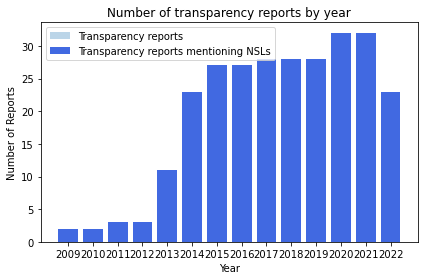

<Figure size 432x288 with 0 Axes>

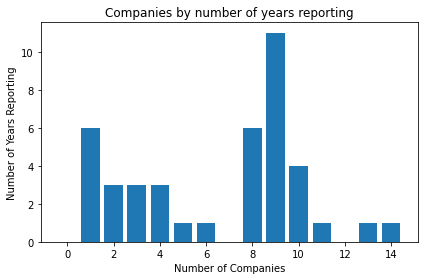

<Figure size 432x288 with 0 Axes>

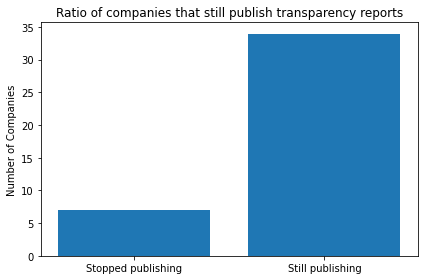

<Figure size 432x288 with 0 Axes>

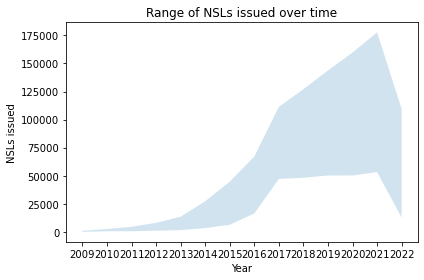

<Figure size 432x288 with 0 Axes>

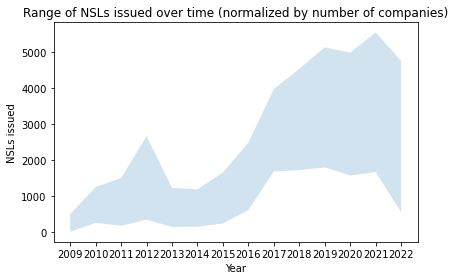

<Figure size 432x288 with 0 Axes>

In [2]:
#!/usr/bin/python3
import matplotlib.pyplot as plt
import numpy as np
import csv

# Load data from dir
DATA_DIR = "../../data/extracted"
RESULTS_DIR = "../../data/processed"
RAW_DIR = "../../data/raw"

reports = csv.DictReader(open(DATA_DIR + "/transparency_reports.csv", "r"))

years_nsl = {
    "2009": list(),
    "2010": list(),
    "2011": list(),
    "2012": list(),
    "2013": list(),
    "2014": list(),
    "2015": list(),
    "2016": list(),
    "2017": list(),
    "2018": list(),
    "2019": list(),
    "2020": list(),
    "2021": list(),
    "2022": list(),
}

years = {
    "2009": list(),
    "2010": list(),
    "2011": list(),
    "2012": list(),
    "2013": list(),
    "2014": list(),
    "2015": list(),
    "2016": list(),
    "2017": list(),
    "2018": list(),
    "2019": list(),
    "2020": list(),
    "2021": list(),
    "2022": list(),
}

years_rep = {
    0: list(),
    1: list(),
    2: list(),
    3: list(),
    4: list(),
    5: list(),
    6: list(),
    7: list(),
    8: list(),
    9: list(),
    10: list(),
    11: list(),
    12: list(),
    13: list(),
    14: list(),
}

total_nsls = {
    "2009": [0, 0],
    "2010": [0, 0],
    "2011": [0, 0],
    "2012": [0, 0],
    "2013": [0, 0],
    "2014": [0, 0],
    "2015": [0, 0],
    "2016": [0, 0],
    "2017": [0, 0],
    "2018": [0, 0],
    "2019": [0, 0],
    "2020": [0, 0],
    "2021": [0, 0],
    "2022": [0, 0],
}

companies = list()

stopped_reporting = [0, 0]

for line in reports:
        
    name = line["Company"]
    companies.append(name)
    rep = 0
    min_ = 0
    max_ = 0
 
    for year in years:
        val = line[year]
        if val:
            val = val.replace(" ", "")
            rep += 1
            if "," in val:
                ranges = val.split(",")
                if ranges[0]:
                    if "-" in ranges[0]:
                        m, M = ranges[0].split("-")
                        min_ += int(m)
                        max_ += int(M)
                    else:
                        min_ += int(ranges[0])
                        max_ += int(ranges[0])
                if ranges[1]:
                    if "-" in ranges[1]:
                        m, M = ranges[1].split("-")
                        min_ += int(m)
                        max_ += int(M)
                    else:
                        min_ += int(ranges[1])
                        max_ += int(ranges[1])
            years_nsl[year].append(name)
            total_nsls[year][0] += min_ 
            total_nsls[year][1] += max_ 

    if line["2022"] or line["2021"]: 
        stopped_reporting[1] += 1
    else:
        if rep:
            stopped_reporting[0] += 1

    years_rep[rep].append(name)
        
for row in reports:
    if row["Company Name"] in companies:
        for year in row["Years of Reporting"].split(", "):
            years[year].append(name)

fig, ax = plt.subplots()
al = ax.bar(years.keys(), [len(years[_]) for _ in years], alpha=0.3)
nsl = ax.bar(years_nsl.keys(), [len(years_nsl[_]) for _ in years_nsl], color="royalblue")
ax.legend([al, nsl], ["Transparency reports", "Transparency reports mentioning NSLs"])
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.title('Number of transparency reports by year')
plt.tight_layout()
plt.show()
plt.savefig("{}/transparency_reports_over_time.pdf".format(RESULTS_DIR), dpi=200)
plt.savefig("{}/transparency_reports_over_time.png".format(RESULTS_DIR), dpi=200)

fig, ax = plt.subplots()
ax.bar(years_rep.keys(), [len(years_rep[_]) for _ in years_rep])
plt.xlabel('Number of Companies')
plt.ylabel('Number of Years Reporting')
plt.title('Companies by number of years reporting')
plt.tight_layout()
plt.show()
plt.savefig("{}/transparency_reports_number_of_years_reporting.pdf".format(RESULTS_DIR), dpi=200)
plt.savefig("{}/transparency_reports_number_of_years_reporting.png".format(RESULTS_DIR), dpi=200)

fig, ax = plt.subplots()
ax.bar(["Stopped publishing", "Still publishing"], stopped_reporting)
plt.ylabel('Number of Companies')
plt.title('Ratio of companies that still publish transparency reports')
plt.tight_layout()
plt.show()
plt.savefig("{}/transparency_reports_stopped_reporting.pdf".format(RESULTS_DIR), dpi=200)
plt.savefig("{}/transparency_reports_stopped_reporting.png".format(RESULTS_DIR), dpi=200)

fig, ax = plt.subplots()
ax.fill_between(total_nsls.keys(), [total_nsls[_][0] for _ in total_nsls], [total_nsls[_][1] for _ in total_nsls], alpha=0.2)
plt.xlabel('Year')
plt.ylabel('NSLs issued')
plt.title('Range of NSLs issued over time')
plt.tight_layout()
plt.show()
plt.savefig("{}/transparency_reports_nsl_ranges.pdf".format(RESULTS_DIR), dpi=200)
plt.savefig("{}/transparency_reports_nsl_ranges.png".format(RESULTS_DIR), dpi=200)

fig, ax = plt.subplots()
ax.fill_between(total_nsls.keys(), [(total_nsls[_][0])/len(years_nsl[_]) for _ in total_nsls], [(total_nsls[_][1])/len(years_nsl[_]) for _ in total_nsls], alpha=0.2)
plt.xlabel('Year')
plt.ylabel('NSLs issued')
plt.title('Range of NSLs issued over time (normalized by number of companies)')
plt.tight_layout()
plt.show()
plt.savefig("{}/transparency_reports_nsl_ranges_normalized.pdf".format(RESULTS_DIR), dpi=200)
plt.savefig("{}/transparency_reports_nsl_ranges_normalized.png".format(RESULTS_DIR), dpi=200)
